<a href="https://colab.research.google.com/github/ibombonato/aicrowd-blitz-faceimages/blob/main/%5BDeepFace%5D_Face_Recognition_Facenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://images.aicrowd.com/raw_images/challenges/banner_file/1021/e6d6bda6dc16f4905124.png)

<h2><center>Starter Code for Face Recognition</center></h2>


In this baseline we will be using basic [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)
 to compare the missing person image to all target faces ans generate our predictions. 

## Downloading Dataset

Installing puzzle datasets via `aicrowd-cli`

In [ ]:
!nvidia-smi

Fri Feb 18 17:52:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install aicrowd-cli

     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 214 kB 23.8 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 40.5 MB/s 
     |████████████████████████████████| 170 kB 52.7 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 22.3.0
    Uninstalling pyzmq-22.3.0:
      Successfully uninstalled pyzmq-22.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you hav

In [ ]:
!pip install deepface

     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 2.3 MB 8.8 MB/s 
     |████████████████████████████████| 462 kB 65.4 MB/s 


In [ ]:
!pip install face_recognition

In [ ]:
# Make sure to re-run below code whenever you restart colab notebook
%load_ext aicrowd.magic

# Logging in from our AIcrowd account. Make sure you have accepted the puzzle rules before logging in!  

%aicrowd login

Please login here: https://api.aicrowd.com/auth/cF58aQObmlSGSsIQGcvqqra49y9PPeKluQIEQBU0qiM
API Key valid
Gitlab access token valid
Saved details successfully!


In [ ]:
# Creating a new data directory and downloading the dataset 

!rm -rf data
!mkdir data
%aicrowd ds dl -c face-recognition -o data

data.zip:   0%|          | 0.00/747M [00:00<?, ?B/s]

sample_submission.csv:   0%|          | 0.00/9.02k [00:00<?, ?B/s]

In [ ]:
# unzipping the data

!unzip data/data.zip -d /content/data > /dev/null

## Importing Libraries

In [ ]:
import pandas as pd
import os
import numpy as np
import random
from tqdm.notebook import tqdm
from google.colab.patches import cv2_imshow
import cv2
from deepface import DeepFace

random.seed(42)

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


## Reading Dataset

In [ ]:
# Getting all image ids from a folder

image_ids = os.listdir("data/missing")
len(image_ids)

1000

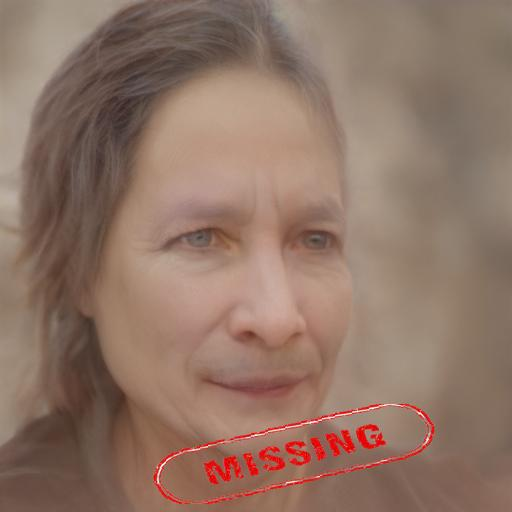

In [ ]:
# Reading a sample missing person image


sample_image_id = '6qzfo.jpg'#random.choice(image_ids)
sample_missing = cv2.imread(os.path.join("data/missing", sample_image_id))
cv2_imshow(sample_missing)

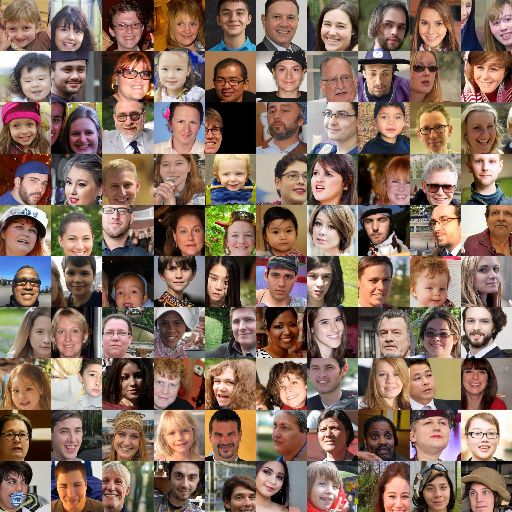

In [ ]:
# Reading the corrosponding target faces

sample_target = cv2.imread(os.path.join("data/target", sample_image_id))
cv2_imshow(cv2.resize(sample_target, (512, 512)))

In [ ]:
# We can also split all the faces in the target image to convert them into individual faces images

sample_target_faces = []

def get_target_face(face_no, target_image):

  # Top-Left x, y corrdinates of the specific face 
  x, y = (int(face_no[0]))*216, (int(face_no[1]))*216

  target_face = target_image[x:x+216, y:y+216]

  target_face = cv2.resize(target_face, (216, 216))

  return target_face#[:, :, ::-1]

In [ ]:
def match_target_face(known_image, unknown_image, model):
  #result = DeepFace.verify(img1_path = known_image, img2_path = unknown_image)
  result = DeepFace.verify(img1_path = known_image, img2_path = unknown_image, model_name='Facenet', model=model, enforce_detection=False, distance_metric='cosine')
  #print(result)
  return float(result['distance'])
  

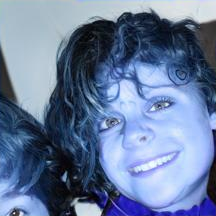

In [ ]:
# Showing a sample face from a sample target image 
sample_target_face = get_target_face("75", sample_target)
cv2_imshow(sample_target_face)

## Generating Predictions

In [ ]:
import face_recognition

In [ ]:
model = DeepFace.build_model('Facenet')

In [ ]:
predictions = {"ImageID":[], "target":[]}

for img_id in tqdm(image_ids):

  #missing_image = cv2.imread(os.path.join("data/missing", img_id), 0)
  missing_image = face_recognition.load_image_file(os.path.join("data/missing", img_id))
  missing_image = cv2.resize(missing_image, (216, 216))
  missing_image = missing_image#[:, :, ::-1]

  #target_image = cv2.imread(os.path.join("data/target", img_id), 0)
  target_image = face_recognition.load_image_file(os.path.join("data/target", img_id))

  # Face no with minimum MSE
  min_distance_face_no = 0
  min_distance = 10000000

  for face_no in range(100):

    # Getting the specific face from the target image
    face_no = str(face_no)
    face_no = face_no.zfill(2)

    target_face = get_target_face(face_no, target_image)

    distance = match_target_face(missing_image, target_face, model)

    #print(f"Face number {face_no}: Distance: {distance}")

    if distance < min_distance:
      min_distance = distance
      min_distance_face_no = face_no

  print(f"ImageID: {img_id}, target: {min_distance_face_no}, Distance: {min_distance}")
  predictions['ImageID'].append(img_id.replace(".jpg", ""))
  predictions['target'].append(min_distance_face_no)


  0%|          | 0/1000 [00:00<?, ?it/s]

ImageID: a74x0.jpg, target: 75, Distance: 0.40378720135701585
ImageID: rh6dw.jpg, target: 37, Distance: 0.49372820882091406
ImageID: 3whr1.jpg, target: 05, Distance: 0.26436504234673386
ImageID: uprjf.jpg, target: 78, Distance: 0.46652014416533805
ImageID: sr232.jpg, target: 28, Distance: 0.6144271278831037
ImageID: ho13y.jpg, target: 19, Distance: 0.613554835959436
ImageID: g7y9n.jpg, target: 64, Distance: 0.6025466115399047
ImageID: zu530.jpg, target: 49, Distance: 0.3933245559522264
ImageID: tp2t5.jpg, target: 70, Distance: 0.21795631904741142
ImageID: kcgfc.jpg, target: 34, Distance: 0.5957255199139058
ImageID: 4jpzz.jpg, target: 80, Distance: 0.6312743279146493
ImageID: 88wdd.jpg, target: 22, Distance: 0.3732033264165945
ImageID: 80081.jpg, target: 93, Distance: 0.6486359672349757
ImageID: 2nem2.jpg, target: 03, Distance: 0.44481910258426693
ImageID: bemp5.jpg, target: 51, Distance: 0.5567667191510819
ImageID: opml4.jpg, target: 41, Distance: 0.5719217029576869
ImageID: o8qxk.jpg,

In [ ]:
submission = pd.DataFrame(predictions)
submission

,ImageID,target
0,a74x0,75
1,rh6dw,37
2,3whr1,05
3,uprjf,78
4,sr232,28
...,...,...
995,ad65t,93
996,1v7to,80
997,61xtk,64
998,kag99,72


### Saving the Predictions

In [ ]:
# Saving the predictions
!rm -rf assets
!mkdir assets
submission.to_csv(os.path.join("assets", "submission.csv"), index=False)

## Submitting our Predictions

In [ ]:
%aicrowd notebook submit -c face-recognition -a assets --no-verify

Using notebook: [DeepFace] Face Recognition for submission...
Scrubbing API keys from the notebook...


Output()

╭─────────────────────────╮                                                   
                                                   │ Successfully submitted! │                                                   
                                                   ╰─────────────────────────╯

                                                         Important links                                                         
┌──────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/face-recognition/submissions/174422              │
│                  │                                                                                                            │
│  All submissions │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/face-recognition/submissions?my_submissions=true │
│                  │                                                                                                            │
│      Leaderboard │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/face-recognition/leaderboards                    │
│                  │                                                                                                            │
│ Discussion forum │ https://discourse.aicrowd.com/c/ai-blitz-xiii                                                              │
│                  │                                                                                                            │
│   Challenge page │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/face-recognition                                 │
└──────────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

Congratulations to making your first submission in the puzzle 🎉  . Let's continue with the journey by improving the baseline & making submission! Don't be shy to ask question related to any errors you are getting or doubts in any part of this notebook in discussion forum or in AIcrowd Discord sever, AIcrew will be happy to help you :)

Have a cool new idea that you want to see in the next blitz ? Let us know!